Stratistical Techniques for Data Analysis
Eduardo Saldivar
Student Number: 2023077

TASK 1
- Your task is to find a dataset of interest to you, that contains a mix of categorical and numerical variables. As
  a guideline, the dataset should have a minimum of two categorical variables and three numerical variables
  (these miminum criteria are guidelines and not hard thresholds).
  If you wish you can make use of the following websites to find the dataset:
    • The Irish government data repository: https://data.gov.ie/
    • Google dataset search: https://datasetsearch.research.google.com/
  You must then use the methods covered in this course to complete an analysis and write a report on the
  data using Python Notebook. The analysis of the data should involve the use of tables, numerical
  summaries, and graphical summaries of the data.
  This part of your assignment will be assessed in terms of:
    • Use of appropriate functions in Python.
    
    • Clearly commenting the code in the .ipynb file.
    
    • Producing clear results for the chosen dataset, using appropriate statistical measures and appropriate plots.
    
    • The quality of the graphics included.
    
    • Summarising the conclusions from the analysis appropriately.

For this CA, I decided to make a data analysis about the last UEFA Champions League teams. This dataset contains 3 categorical values and 5 numerical values.
The purpose of my research is to be able to find which team made the more amount goals during the tournament. Sometimes a team that score the most goals or the team who have the best scorer or goalkeeper will not be able to win the tournament. With this data I want to prove that sometimes scoring many goals is not enough to win in football. 

In [1]:
# Importing some libraries to read my dataset
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset:
dataset = pd.read_csv('key_stats.csv')

In [3]:
# I will read my dataset, checking that the csv upload was succesful.
dataset.head(1000)

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4
...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2


I will use describe to check if I have some NaN values on my data, as well to make sure the type of all my columns.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_name       747 non-null    object
 1   club              747 non-null    object
 2   position          747 non-null    object
 3   minutes_played    747 non-null    int64 
 4   match_played      747 non-null    int64 
 5   goals             747 non-null    int64 
 6   assists           747 non-null    int64 
 7   distance_covered  747 non-null    object
dtypes: int64(4), object(4)
memory usage: 46.8+ KB


I will use describe method to see the meaningful data, which will help me to generate the insights of it.
From this description I can see the mean of all my data and decide which value is the best to generate a 
data analysis.

In [5]:
dataset.describe()

,minutes_played,match_played,goals,assists
count,747.00000,747.000000,747.000000,747.000000
mean,331.61178,5.089692,0.492637,0.376171
std,248.37193,2.721425,1.313321,0.845502
min,1.00000,1.000000,0.000000,0.000000
25%,116.00000,3.000000,0.000000,0.000000
50%,301.00000,5.000000,0.000000,0.000000
75%,492.00000,7.000000,0.000000,0.000000
max,1230.00000,13.000000,15.000000,7.000000


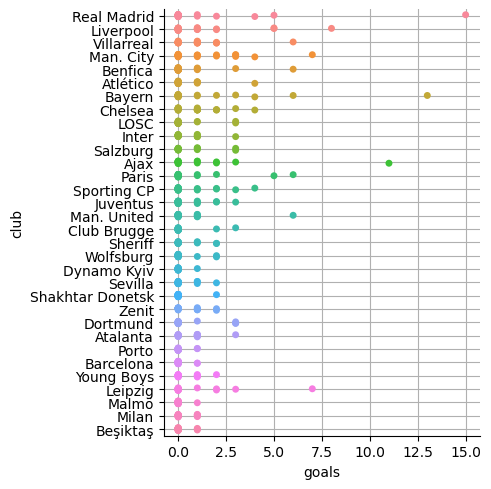

In [6]:
sns.catplot(x = 'goals', y = 'club', data = dataset)
plt.grid()

First, I will group my dataset by club. With this group by, now i have all the stadistics by team and I can decide
how to manage my data.

In [7]:
# Note: I am grouping by the sum of each club's data.
data_clubs = dataset.groupby(['club'], axis = 0).sum()
data_clubs

,minutes_played,match_played,goals,assists
club,,,,
Ajax,7912,115,21,17
Atalanta,5940,92,12,11
Atlético,9425,148,9,7
Barcelona,5939,91,2,1
Bayern,9901,153,30,24
Benfica,9900,157,13,10
Beşiktaş,5893,88,3,2
Chelsea,10230,152,21,16
Club Brugge,5940,89,5,5


The total of teams that played the tournament is a total of 32. I will reduce the number by choosing the 8 teams that have the most goals during the tournament.

In [8]:
# Here im making a new dataset that includes the 8 teams that have the most goals in the tournament.
best_8 = data_clubs.sort_values("goals", ascending = False).head(8)
best_8

,minutes_played,match_played,goals,assists
club,,,,
Bayern,9901,153,30,24
Real Madrid,13531,197,28,21
Man. City,12204,175,28,23
Liverpool,12871,203,28,23
Ajax,7912,115,21,17
Chelsea,10230,152,21,16
Villarreal,11871,184,20,16
Paris,7920,113,15,7


The last UEFA Champions League quarter finals were the following teams:
- Chelsea
- Real Madrid.
- Manchester City
- Atlético de Madrid.
- Villarreal
- Bayern Múnich.
- Benfica
- Liverpool.

With this information, we can see that not always the team that makes the most goals will be on the finals.
We have the example of teams like Ajax and Paris. These two teams are on the top 8 teams with more goals and still didn't made it to the quarter finals.

I will make up more digging in this data by making smaller our database and see which teams made it to the
semifinals.

In [9]:
# Here im making a new dataset that includes the 4 teams that scored the most goals in the tournament.
best_4 = data_clubs.sort_values("goals", ascending = False).head(4)
best_4

,minutes_played,match_played,goals,assists
club,,,,
Bayern,9901,153,30,24
Real Madrid,13531,197,28,21
Man. City,12204,175,28,23
Liverpool,12871,203,28,23


The last UEFA Champions League semifinals were the next teams:
- Real Madrid
- Man. City
- Liverpool
- Villarreal

In this case, the team that had the most goals in the tournament didnt even made it to the semifinals. This shows that 
scoring the most goals doesnt mean that you will be the champion team.

I will make a plot to show this numbers.

In [10]:
# We need to create a new dataset with the name and all the goals of each team.

# We create the variable club_name which will hold our name of the team.
club_name = pd.unique(dataset['club'])
club_name= pd.Series(club_name)

# We create now the club_goals variable which will hold our goals per team
club_goals=[]
for name in club_name:
    club_goals.append(dataset.loc[dataset['club']==name]['goals'].sum())
    
club_goals=pd.Series(club_goals)

# creating a new dataframe:
goals_by_clubs = pd.concat([club_name, club_goals], axis=1, keys = ["club", "goals"])

This is our new dataset which will help us create the plot for the goal team comparison.

In [11]:
goals_by_clubs

,club,goals
0,Real Madrid,28
1,Liverpool,28
2,Villarreal,20
3,Man. City,28
4,Benfica,13
5,Atlético,9
6,Bayern,30
7,Chelsea,21
8,LOSC,8
9,Inter,9


With our new dataset we can also check who was the team who scored the maximum and minimum goals during the tournament.

In [12]:
# We check who was the team who score more goals during the tournament. Bayern Munich
goals_by_clubs.loc[goals_by_clubs['goals']==goals_by_clubs['goals'].max()]

,club,goals
6,Bayern,30


In [13]:
# We check who was the team who score the less goals during the tournament. Dynamo Kiev and Malmo.
goals_by_clubs.loc[goals_by_clubs['goals']==goals_by_clubs['goals'].min()]

,club,goals
19,Dynamo Kyiv,1
29,Malmö,1


I will create my plot which will show me the teams and all their goals during the UEFA Champions League.
We know that this tournament the final was between Real Madrid and Liverpool. Lets see in this barplot if
either of those two have the highest amount of goals.

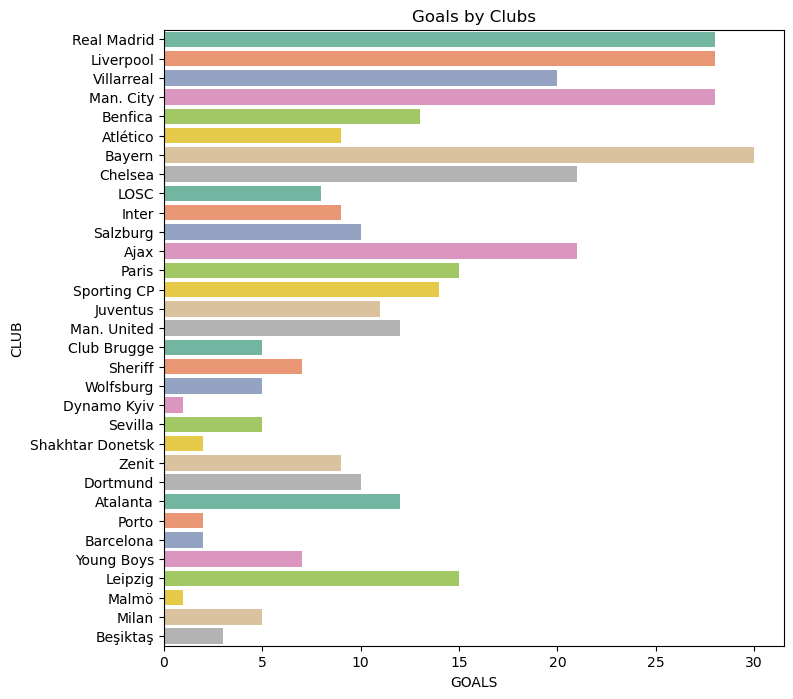

In [14]:
plt.subplots(figsize=(8,8))
sns.barplot(y='club', x='goals', data=goals_by_clubs, palette='Set2')

plt.xlabel("GOALS")
plt.ylabel("CLUB")
plt.title("Goals by Clubs")
plt.show()

We see that Bayern Munich was the team with more goals during the tournament. In order to win a big tournament
like the UEFA Champions League, scoring goals is not everything.

In [15]:
# We calculate how many goals were in total.
goals_by_clubs["goals"].sum()

368

We know that during the tournamet they were scored 368 goal. I will create a plot to check what percentage
each team contributes to this quantity of goals.

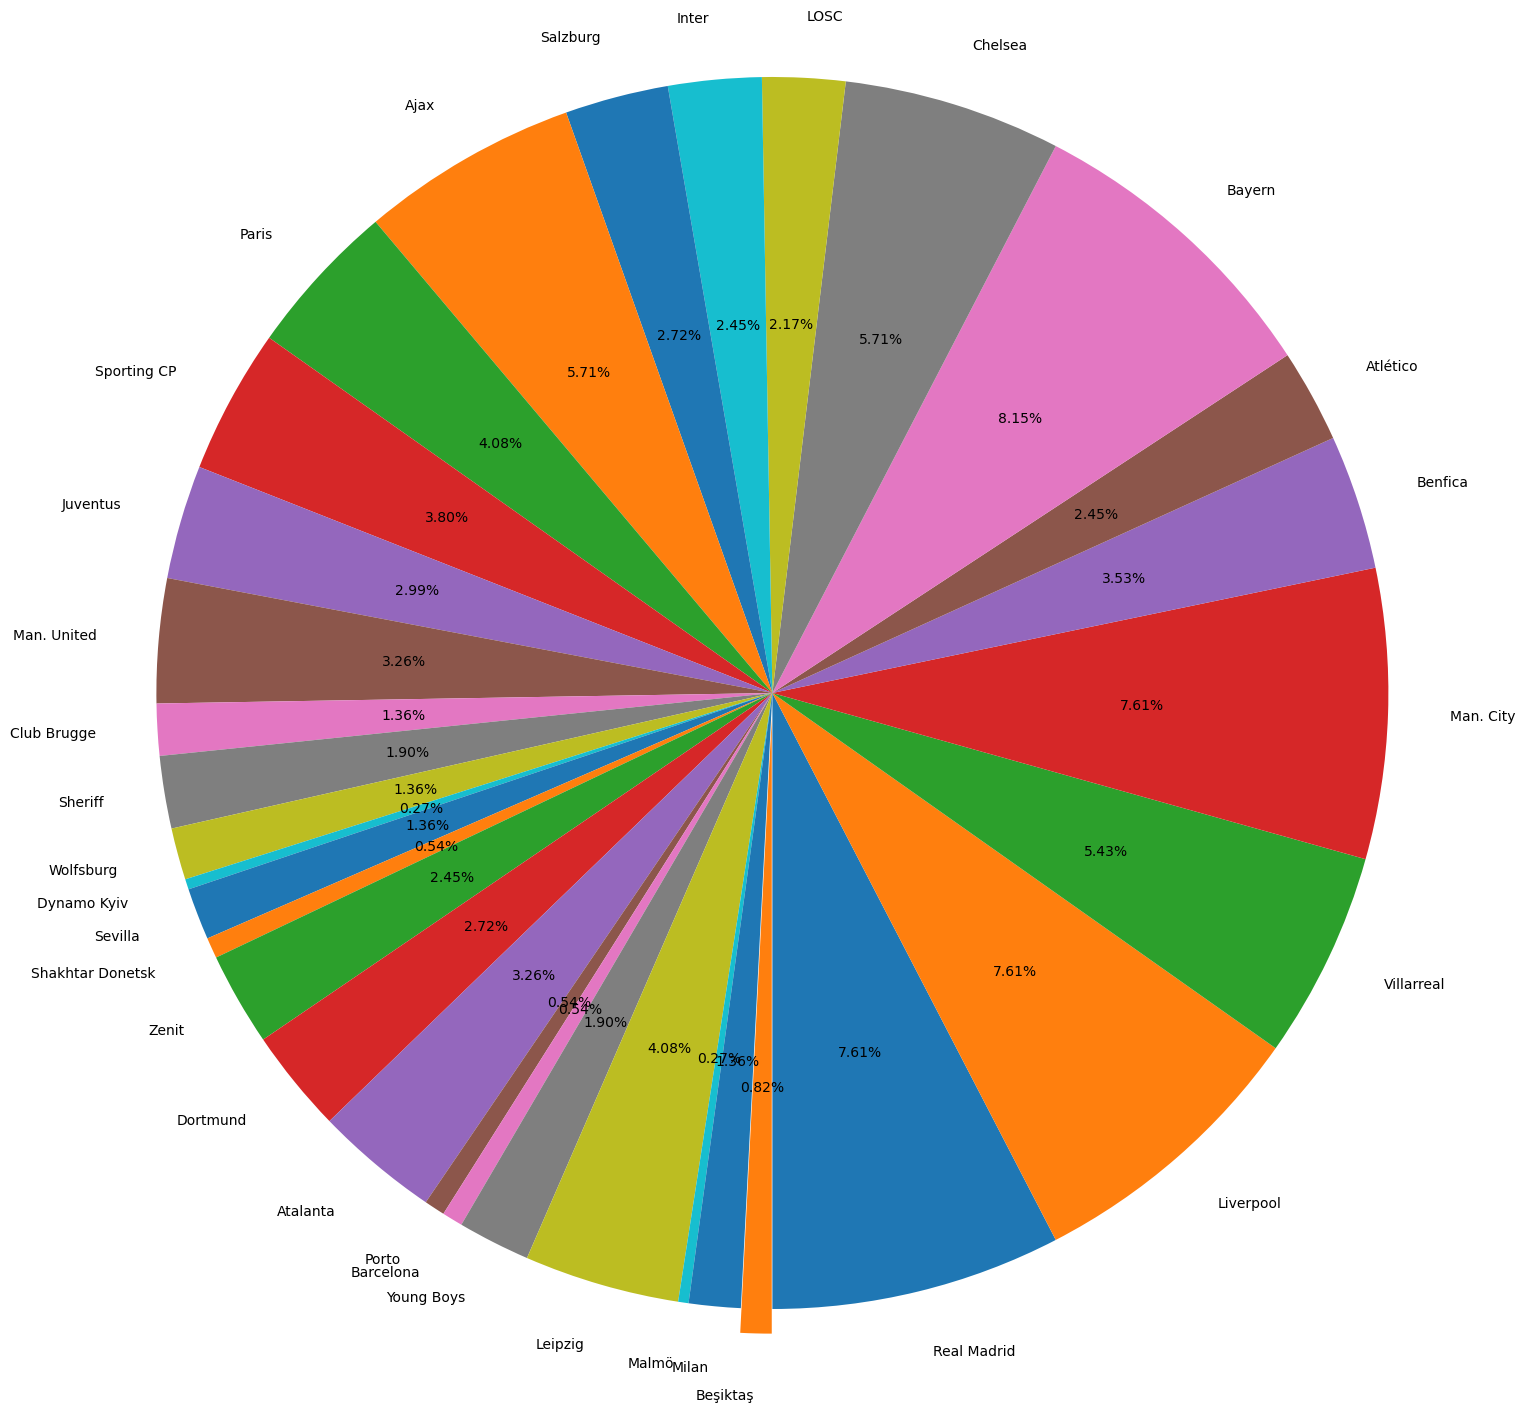

In [16]:
# I created a pie chart to check the percentages of goals.
plt.subplots(figsize=(100,8))
explode=np.zeros(len(goals_by_clubs))
explode[len(goals_by_clubs)-1]=0.1
plt.pie(goals_by_clubs['goals'], labels=goals_by_clubs['club'], autopct='%0.2f%%', radius=2.5, explode=explode, 
        startangle=270)

plt.show()

- Bayern Munich contributed 8.15%
- Real Madrid contributed 7.61%
- Liverpool contributed 7.61%
- Manchester City contributed 7.61%

If it was about goals, the semifinals should've been between this four teams.

Now I will analize the players who plays as forward to see how many goals they contributed to their team. With this we will see if having the best scorer of the tournament in your team helps to get the cup of the tournament.

In [17]:
forwards = dataset[(dataset['goals'] > 0) & (dataset['position'] == 'Forward')].reset_index(drop=True)

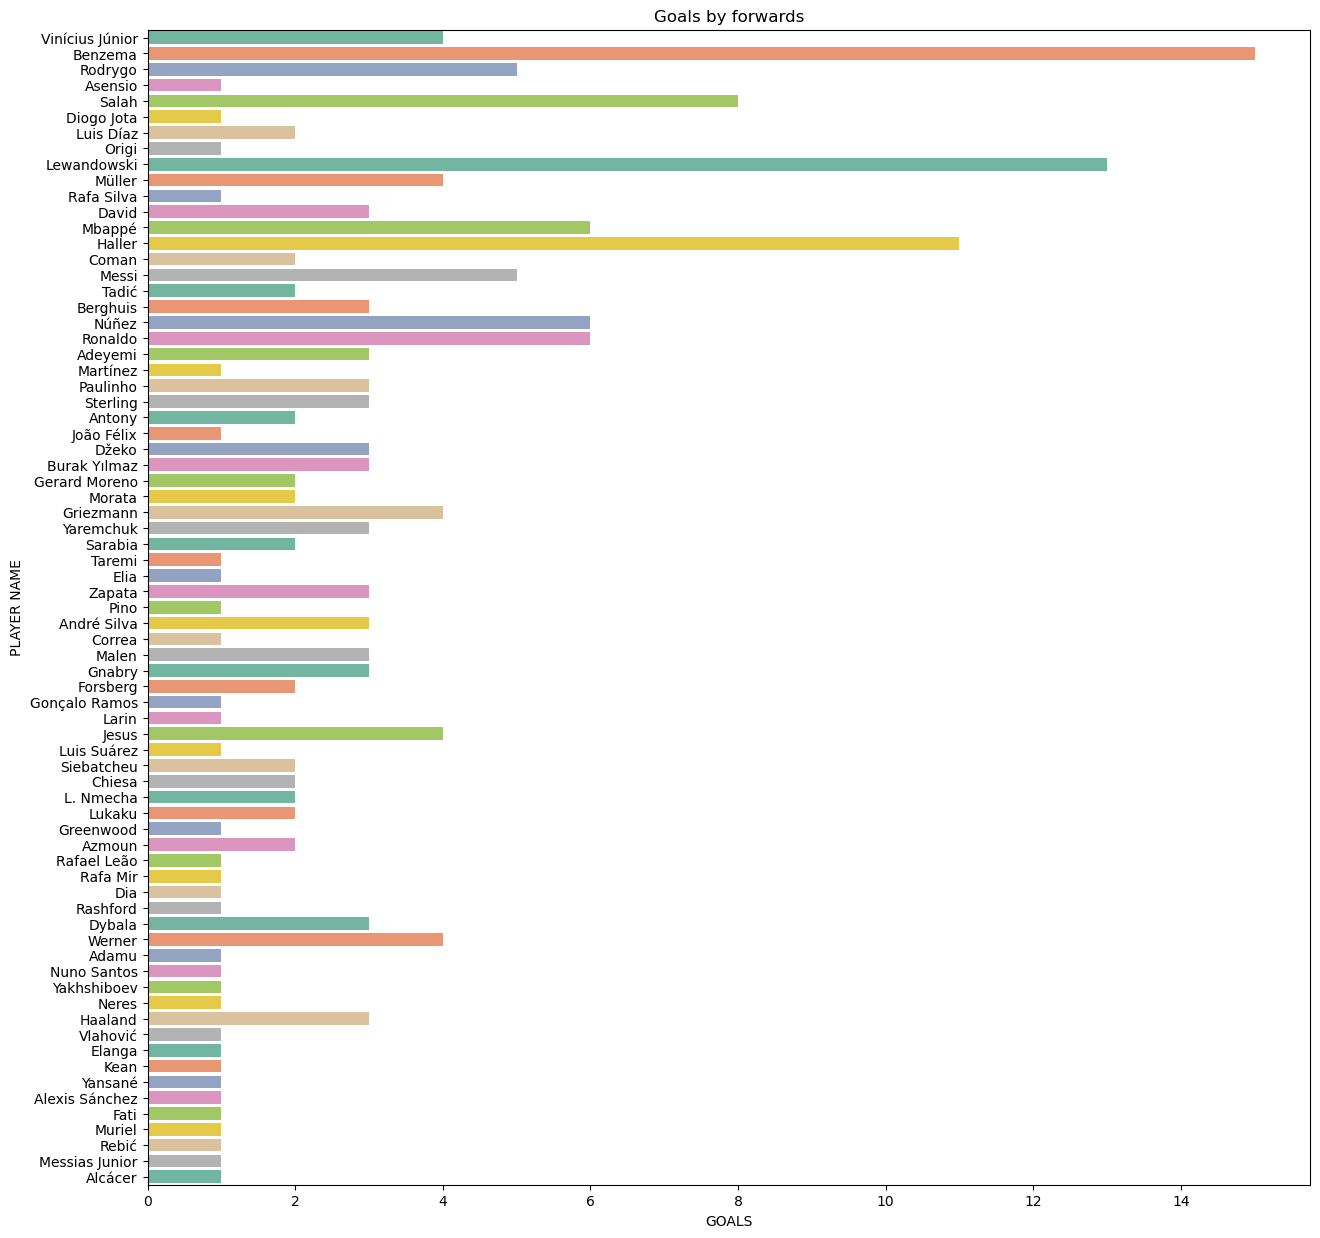

In [18]:
plt.subplots(figsize=(15,15))
sns.barplot(y='player_name', x='goals', data=forwards, palette='Set2')

plt.xlabel("GOALS")
plt.ylabel("PLAYER NAME")
plt.title("Goals by forwards")
plt.show()

We can see that players as Benzema, Lewandowski and Haller are highlighted with their numbers of goals. The quantity of players is big so now I will take the best 20 and analize the average of goals they contributed to their club.

In [19]:
best20_forwards = forwards.sort_values(by="goals", ascending=False).head(20)
best20_forwards

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
1,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
8,Lewandowski,Bayern,Forward,876,10,13,3,99.7
13,Haller,Ajax,Forward,668,8,11,1,82.2
4,Salah,Liverpool,Forward,1008,13,8,2,112.0
19,Ronaldo,Man. United,Forward,611,7,6,0,59.2
18,Núñez,Benfica,Forward,613,10,6,0,72.4
12,Mbappé,Paris,Forward,673,8,6,4,65.2
2,Rodrygo,Real Madrid,Forward,505,11,5,2,65.7
15,Messi,Paris,Forward,630,7,5,0,58.7
0,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0


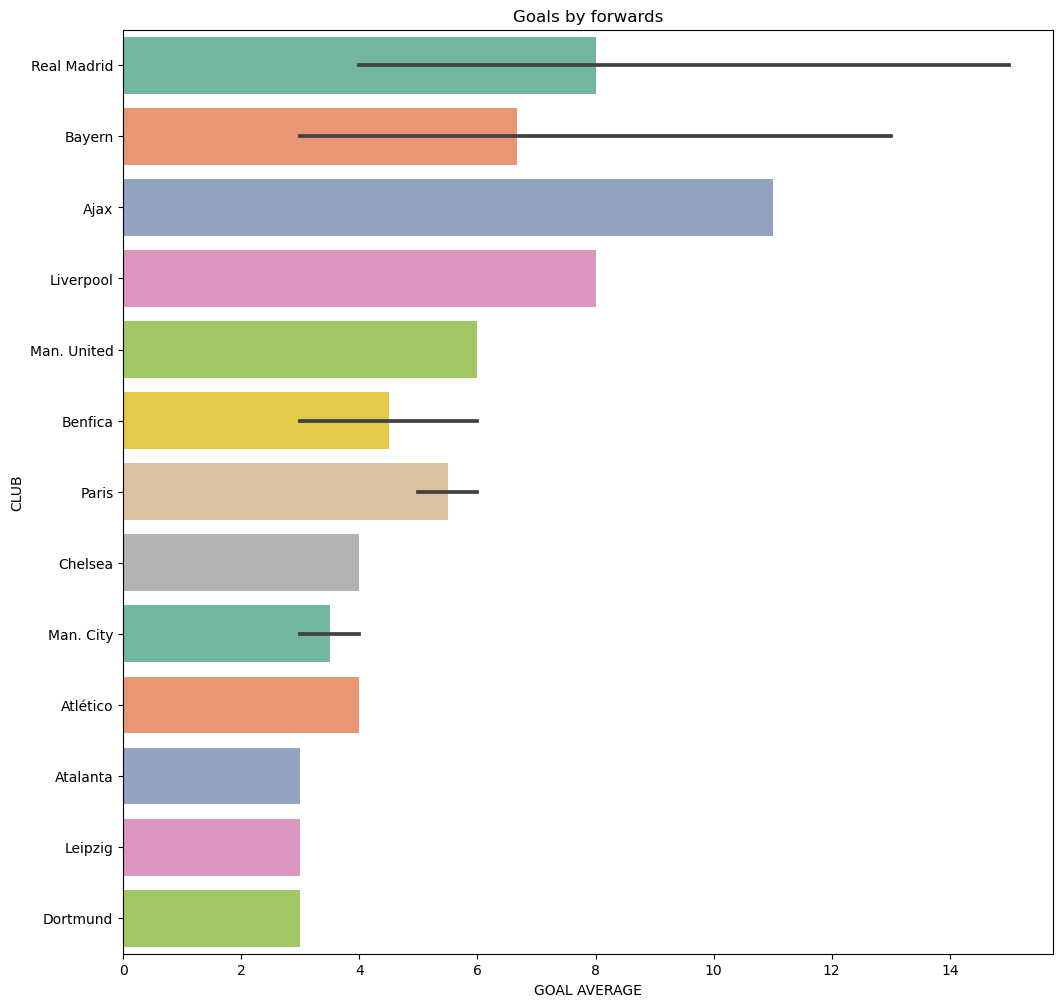

In [20]:
plt.subplots(figsize=(12,12))
sns.barplot(y='club', x='goals', data=best20_forwards, palette='Set2')

plt.xlabel("GOAL AVERAGE")
plt.ylabel("CLUB")
plt.title("Goals by forwards")
plt.show()

In this plot we can see that the forwards who play with Real Madrid helped the team with an average of 8 goals, but Benzema alone scored 15. So returning to our observation, we know that having the player with most goals in the tournament is helpful to win the cup.
We can also see a different scenario with Ajax. They have 11 average goals by forwards thanks to Haller contribution. Even though they have a big average and a top 3 scorer in their team, Ajax couldnt event make it to the quarter finals.

But what happen with teams like Manchester City and Villarreal? They are top 5 teams with most goals of the tournament, but it seems like their forward didnt helped them up. Now I will analize the goals per team by midfielders.

In [21]:
mids = dataset[(dataset['goals'] > 0) & (dataset['position'] == 'Midfielder')].reset_index(drop=True)
best20_mids= mids.sort_values(by="goals", ascending=False).head(20)
best20_mids

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
9,Mahrez,Man. City,Midfielder,986,12,7,2,120.1
23,Nkunku,Leipzig,Midfielder,531,6,7,0,62.8
10,Danjuma,Villarreal,Midfielder,906,11,6,2,107.8
12,Sané,Bayern,Midfielder,798,10,6,6,94
2,Mané,Liverpool,Midfielder,822,13,5,1,100.3
6,Firmino,Liverpool,Midfielder,323,7,5,0,43.0
47,Pedro Gonçalves,Sporting CP,Midfielder,329,5,4,2,41.3
11,Bernardo Silva,Man. City,Midfielder,878,11,3,3,120.3
44,Okafor,Salzburg,Midfielder,345,6,3,0,40
28,Reus,Dortmund,Midfielder,499,6,3,1,62.7


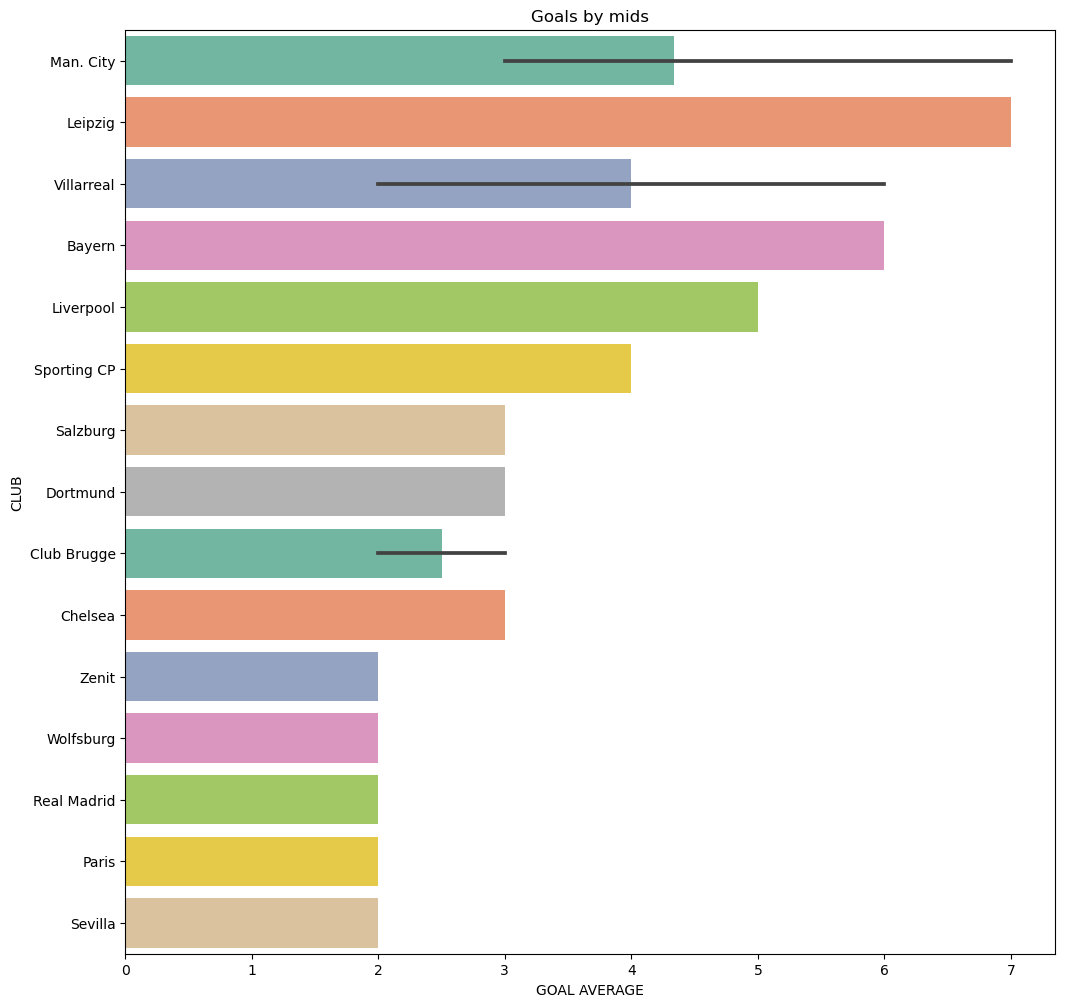

In [22]:
plt.subplots(figsize=(12,12))
sns.barplot(y='club', x='goals', data=best20_mids, palette='Set2')

plt.xlabel("GOAL AVERAGE")
plt.ylabel("CLUB")
plt.title("Goals by mids")
plt.show()

In this plot we can see that the midfielder who play with Manchester City helped the team with an average of 4.5 goals, but Mahrez alone scored 7. The midfielders of teams like Manchester City and Villarreal contributed more with goals that forwards.

In [23]:
mids_forwards = pd.concat([best20_mids, best20_forwards], axis=0)
mids_forwards
mids_forwards.sort_values(by="goals", ascending=False).head(20)

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
1,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
8,Lewandowski,Bayern,Forward,876,10,13,3,99.7
13,Haller,Ajax,Forward,668,8,11,1,82.2
4,Salah,Liverpool,Forward,1008,13,8,2,112.0
23,Nkunku,Leipzig,Midfielder,531,6,7,0,62.8
9,Mahrez,Man. City,Midfielder,986,12,7,2,120.1
10,Danjuma,Villarreal,Midfielder,906,11,6,2,107.8
12,Mbappé,Paris,Forward,673,8,6,4,65.2
18,Núñez,Benfica,Forward,613,10,6,0,72.4
19,Ronaldo,Man. United,Forward,611,7,6,0,59.2


In [24]:
club_name = pd.unique(dataset['club'])
club_name= pd.Series(club_name)

# We create now the club_goals variable which will hold our goals per team and separate them by position
club_goals=[]
goals_mids = []
goals_forwards = []
goals_defenders = []
for name in club_name:
    club_goals.append(dataset.loc[dataset['club']==name]['goals'].sum())
    goals_mids.append(dataset.loc[(dataset['position']=='Midfielder') & (dataset['club']==name)]['goals'].sum())
    goals_forwards.append(dataset.loc[(dataset['position']=='Forward') & (dataset['club']==name)]['goals'].sum())
    goals_defenders.append(dataset.loc[(dataset['position']=='Defender') & (dataset['club']==name)]['goals'].sum())
    
club_goals=pd.Series(club_goals)
goals_mids=pd.Series(goals_mids)
goals_forwards=pd.Series(goals_forwards)
goals_defenders=pd.Series(goals_defenders)

# creating a new dataframe:
ds_goalsByPosition = pd.concat([club_name, goals_mids, goals_forwards, goals_defenders, club_goals], axis=1,
                               keys = ["Club", "Goals by Mids", "Goals by Forwards", "Goals by Defender", "Total Goals"])

ds_goalsByPosition = ds_goalsByPosition.sort_values(by="Total Goals", ascending=False).head(5)
ds_goalsByPosition = pd.DataFrame(ds_goalsByPosition)
ds_goalsByPosition

,Club,Goals by Mids,Goals by Forwards,Goals by Defender,Total Goals
6,Bayern,8,22,0,30
0,Real Madrid,2,25,1,28
1,Liverpool,14,12,2,28
3,Man. City,17,7,4,28
7,Chelsea,10,6,5,21


With this new dataset, we can see the total goals of the top 5 scorer teams. There are teams like Real Madrid and Bayern which most goals came from the Forwards players. We also have some teams like Liverpool, Manchester City and Chelsea which midfielders contributes more in the score.

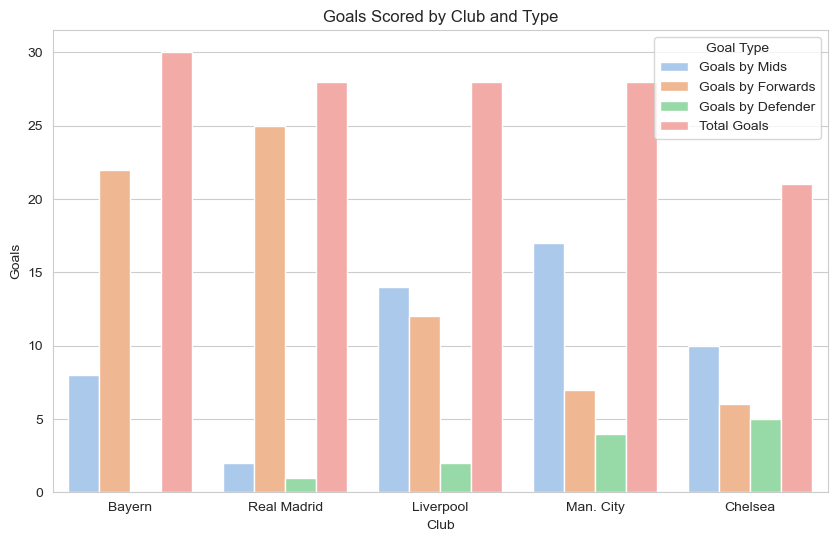

In [25]:
sns.set_style('whitegrid')
sns.set_palette('pastel')

ds_goalsByPosition = pd.melt(ds_goalsByPosition, id_vars=['Club'], var_name='Goal Type', value_name='Goals')

plt.figure(figsize=(10, 6))
sns.barplot(x='Club', y='Goals', hue='Goal Type', data=ds_goalsByPosition)
plt.title('Goals Scored by Club and Type')
plt.xlabel('Club')
plt.ylabel('Goals')
plt.show()

Conclusion
- We know that in able to win in football we need to score goals. But sometimes other things like the mentality,
  luck, referee decisions or even the forecast can affect a whole match, even a in a big tournament.
  
  With this dataset we know that Bayern Munich scored the most goals, but the champion was Real Madrid. Even though
  they have almost the same percentage of goals scored, the champion wasn't the one who scored the most goals in the
  UEFA Champions League 2021-2022.
  
  
- We can see that in some Teams like Manchester City which their forward players werent the ones who scored the most goals for the team, their midfielder contributed more, specially Mahrez who have 7 goals on his own. Football depends on strategy as well,  where some forwards are there to support the passes between lines and help midfielders get closer to the goal.


- Real Madrid have the most players with most goals in the tournament. In this case they were the champions but not because of having the best scorers. We have situations like Bayern, which have Lewandoswki that scored 13 goals but they didnt even make it to the semifinals, but then we have teams like Liverpool which dont have a major top 3 scorer but they made it to the final. But then we have a situation like Leipzig where they have a top 5 scorer but they dont even make it to the quarter finals.

TASK 2

1. What is the probability of rolling exactly two 6s in five rolls of a fair die?

To answer this question, I will use the binomial distribution. I find the binomial distribution usual for this problem because we have the complete data. K succes = 2, p probability = 1/6, n trials = 5.
Using the binomial distribution formula:
P(X=k) = (n/k) * p^k * (1-p)^(n-k)
This is the formula we will use, but of course I will make it done by an easiest way, with the python binom.pmf method.

In [26]:
# First we need to import our libraries. I will use binom to make the binomial distribution
# and matplotlib to make my plots visible
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Our succes is 2
succes = 2
# Our number of trials are 5
trials = 5
# Our probability is 1/6
probability = 1/6

# Having this information, we can apply the binom.pmf method.
binomialDistribution = binom.pmf(k=succes, n=trials, p=probability)
print("The probability of rolling exactly two 6s in five rolls of a fair die is: ", round(binomialDistribution,3))

The probability of rolling exactly two 6s in five rolls of a fair die is:  0.161


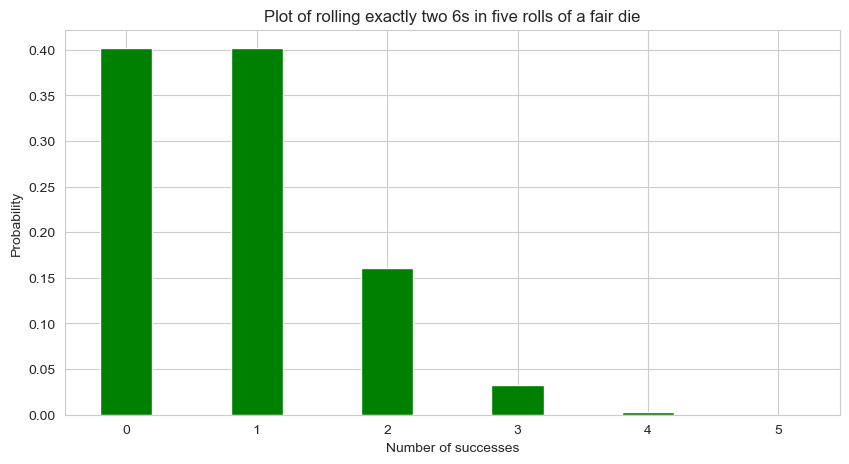

In [28]:
# Creation of the succeses array. The succes is 5 so the outcome is 0, 1, 2, 3, 4, or 5.
# The arange method will create an array from 0 to 5.
succeses = np.arange(0,6)

# Having this information, we can apply the binom.pmf method with all the dice posibilities. 
binomialDistributionPlot = binom.pmf(k=succeses, n=trials, p=probability)

# Creating the plot for this binomial distribution.
figure = plt.figure(figsize = (10, 5))

# Creating the bar plot
plt.bar(succeses, binomialDistributionPlot, color ='green', width = 0.4)

plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.title("Plot of rolling exactly two 6s in five rolls of a fair die")
plt.show()

We can see in this plot that the chances are decreasing with every roll we make. The probability to roll two 6s in a five rolls of a dice is 0.16 or 16%.

2. The number of industrial injuries on average per working week in a factory is 0.75. Assuming that the distribution of injuries follows a Poisson distribution, find the probability that in a particular week there will be no more than two accidents.

In [29]:
# I import poisson method
from scipy.stats import poisson

# Given the problem, we know that k is equal to 2 and our lambda is 0.75. With this data we can call the
# poisson.cdf method so they give us our probability.
l= 0.75
probability = poisson.cdf(2, l)

print("The probability of no more than two accidents that will happen in a week is:", probability)

The probability of no more than two accidents that will happen in a week is: 0.9594945602551861


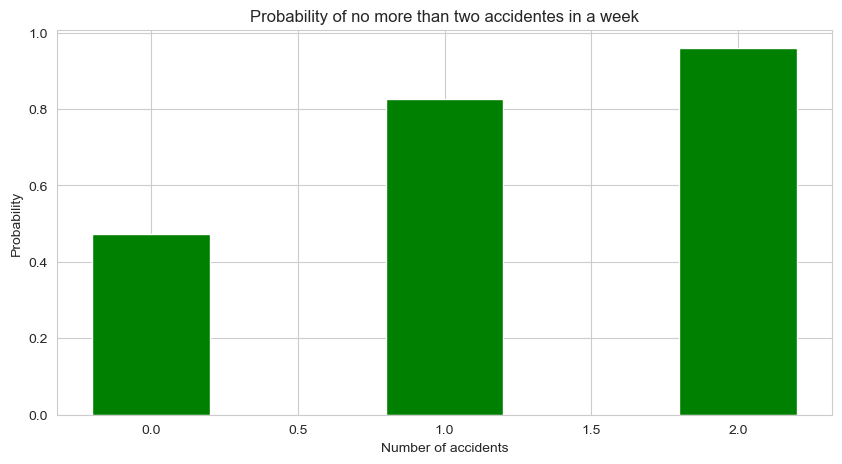

In [30]:
# To be able to see this, I will use the poisson.cdf method. This will show me the probabilities to get 0, 1 and 2 
# accidents in a week.
array = np.arange(0,3)
probabilitiesPoisson = poisson.cdf(k=array, mu=0.75)

fig = plt.figure(figsize = (10, 5))

# Creating the bar plot
plt.bar(array, probabilitiesPoisson, color ='green', width = 0.4)

plt.xlabel("Number of accidents")
plt.ylabel("Probability")
plt.title("Probability of no more than two accidentes in a week")
plt.show()

In this plot we can see the following:
The possibility of having 0s accidents is 0.5.
The possibility of having 1 accident is 0.8.
The possibiliti of having 2 accident is 0.96.

TASK 3
- The time a person spends at Dublin Zoo is Normally distributed with a mean of 90 minutes and a
  standard deviation of 10 minutes.
  Using this distribution, answer the following:
  - If a visitor is selected at random, find the probability that they will spend at most 85 minutes visiting
    the zoo.

In [31]:
# First we import our libraries.
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

# We know that our mu is 90 and our sigma is 10. With this data we can apply our norm.cdf method.
answer1 = norm.cdf(85, loc = 90, scale = 10)
print("The probability that they will spend at most 85 mins is:", round(answer1,3))

The probability that they will spend at most 85 mins is: 0.309


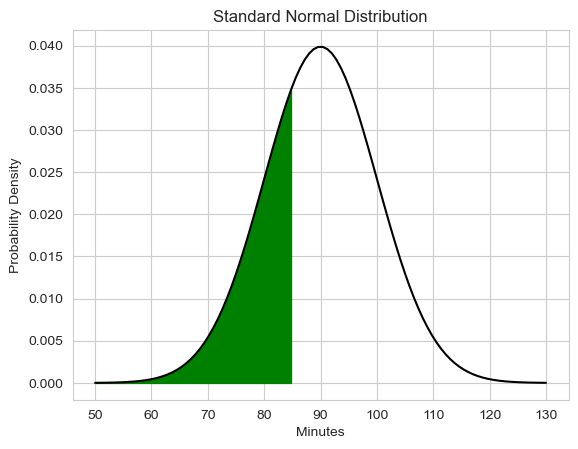

In [41]:
mean = 90
std = 10
x = np.linspace(mean - 4*std, mean + 4*std, 100)
y = norm.pdf(x, mean, std)

plt.plot(x, y, color = "black")
plt.fill_between (x, y, where = (x < 85), color = "green")
plt.title("Standard Normal Distribution")
plt.xlabel("Minutes")
plt.ylabel("Probability Density")
plt.show()

  - If a visitor is selected at random, find the probability that they will spend at least 100 minutes
    visiting the zoo.

In [33]:
# This imply to make the formula 1 - norm.cdf because it implies that it will spend 'at least'.
answer2 = 1 - norm.cdf(100, loc = 90, scale = 10)
print("The probability that they will spend at least 100 mins is:", round(answer2,3))

The probability that they will spend at least 100 mins is: 0.159


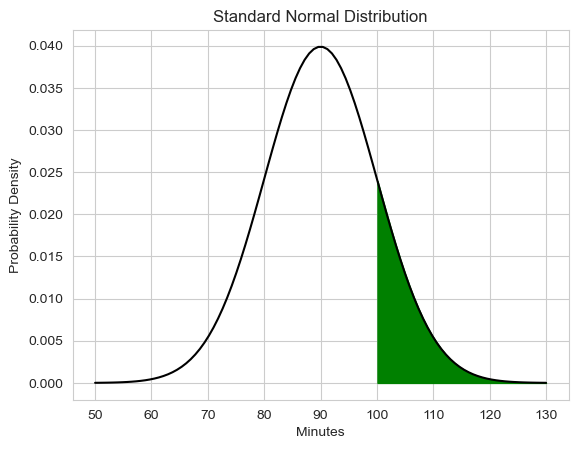

In [42]:
mean = 90
std = 10
x = np.linspace(mean - 4*std, mean + 4*std, 100)
y = norm.pdf(x, mean, std)

plt.plot(x, y, color = "black")
plt.fill_between (x, y, where = (x >= 100), color = "green")
plt.title("Standard Normal Distribution")
plt.xlabel("Minutes")
plt.ylabel("Probability Density")
plt.show()

  - Given that you know that a particular visitor has spent longer than average visiting the Zoo, what is
    the probability that they have spent more than 100 minutes there?
    Stating the answers alone here is not sufficient - you should show clearly how you found your answer, justify
    any decisions made, and include plots where appropriate.

In [35]:
# In this problem, I will use the conditional probability to solve it.

#P(BA) = P(AB) / P(A)

# First we will find the probability of spending more than 100 minutes X > 100
probabilityB = 1 - norm.cdf(100, loc = 90, scale = 10)

# Then we will find the probability of spending more than the average. X > 90
probabilityA = 1 - norm.cdf(90, loc = 90, scale = 10)

# Having our probabilityB and probabilityA, we can use conditional probaility formula.
conditionalProbability = probabilityB / probabilityA

print("The probability that they have spent more than 100 minutes in the zoo is:", round(conditionalProbability,3))

The probability that they have spent more than 100 minutes in the zoo is: 0.317


In order to explain the solution of this problem, we need to use the next formula:

P(BA) = P(AB) / P(A)

We know that P(B) is probabilityB = 1 - norm.cdf(100, loc = 90, scale = 10) and P(A) IS probabilityA = 1 - norm.cdf(90, loc = 90, scale = 10).

We need to find the union between this position.

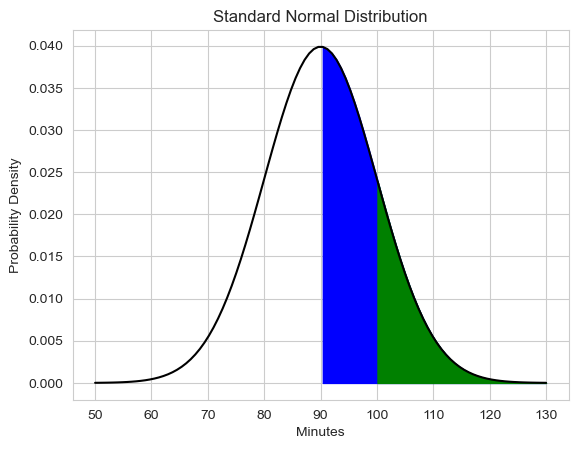

In [46]:
mean = 90
std = 10
x = np.linspace(mean - 4*std, mean + 4*std, 100)
y = norm.pdf(x, mean, std)

plt.plot(x, y, color = "black")
plt.fill_between (x, y, where = (x > 90), color = "blue", label = "Longer than Average")
plt.fill_between (x, y, where = (x > 100), color = "green", label = "Longer than 100min")
plt.title("Standard Normal Distribution")
plt.xlabel("Minutes")
plt.ylabel("Probability Density")
plt.show()

The union is equal to 0.317 or 32%

References:

VanderPlas, J. (2019). Visualization with Seaborn | Python Data Science Handbook. Github.io. Available at: https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

Investopedia. (n.d.). Conditional Probability. Available at: https://www.investopedia.com/terms/c/conditional_probability.asp#:~:text=Conditional%20probability%20refers%20to%20the.

Zach (2021). How to Select Rows by Multiple Conditions Using Pandas loc. Statology. Available at: https://www.statology.org/pandas-loc-multiple-conditions/

Vijetha (2022). How to Plot Columns of Pandas DataFrame. Spark By {Examples}. Available at: https://sparkbyexamples.com/pandas/how-to-plot-columns-of-pandas-dataframe/#:~:text=Pandas%20plot()%20function%20is

GeeksforGeeks. (2018). Python | Pandas.melt(). Available at: https://www.geeksforgeeks.org/python-pandas-melt/.

kaggle.com. (n.d.). UEFA Goalkeepers EDA. Available at: https://www.kaggle.com/code/harshpriye/uefa-goalkeepers-eda

www.tutorialsteacher.com. (n.d.). Python List sort() Method (With Examples). Available at: https://www.tutorialsteacher.com/python/list-sort#:~:text=Python%20List%20sort()%20%2D%20Sorts

Stack Overflow. (n.d.). python - Plot a column data based on setting conditions on other columns. Available at: https://stackoverflow.com/questions/57593462/plot-a-column-data-based-on-setting-conditions-on-other-columns
